In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import requests
# import time
# from scipy.stats import linregress
# from pprint import pprint
# from tqdm.notebook import tqdm
# from sklearn import preprocessing

# Files path to bring in the vehicles registration data
filePathCounty = "./vehicles_data/county_zipcode.csv"
filePathCA = "./vehicles_data/registrations_ca_3.csv"
filePathNY = "./vehicles_data/registrations_ny.csv"
# File path for the car testing data
filePathTestCar = "./vehicles_data/2020testcar.csv"
# File path for all the polluation data pull from the API
filePathPollLA = "./polluation_data/california_data.csv"
filePathPollSF = "./polluation_data/california_sanfrancisco.csv"
filePathPollNY = "./polluation_data/newyork_ny_data.csv"
filePathPollTX = "./polluation_data/texas_houston.csv"
filePathPollIL = "./polluation_data/illinois_chicago_data.csv"

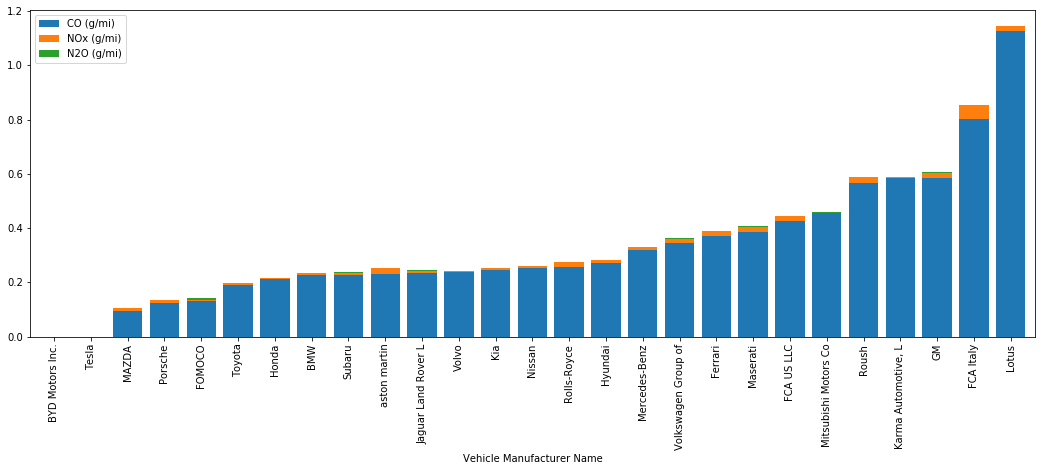

In [37]:
# Read the testing fuel economy data
test_car_org_df = pd.read_csv(filePathTestCar)
# Create the smaller set of df from the original dataset
test_car_df = test_car_org_df[['Vehicle Manufacturer Name', 'Represented Test Veh Model', 
                               'CO (g/mi)', 'NOx (g/mi)', 'N2O (g/mi)']]
# Create a list of data relate to air polluation
test_car_list = ['CO (g/mi)', 'NOx (g/mi)', 'N2O (g/mi)']
# Check if there is any null data in the dataset, if so clean up the data
if test_car_df.isnull().values.any() == False:
    test_car_clean_df = test_car_df
elif test_car_df.isnull().values.any() == True:
    test_car_clean_df = test_car_df.fillna(0)
# Since there are multiple cars/tests done for the same manufacturer, calculate the mean value
test_car_ghg_df = test_car_clean_df.groupby(by='Vehicle Manufacturer Name').mean()
# Sort by the CO since it affect the scale more.
test_car_ghg_df = test_car_ghg_df.sort_values(by=['CO (g/mi)'])

test_car_ghg_df.plot(kind = 'bar',width = .8, figsize = (18,6), stacked = True)

In [7]:
# Read county zipcode into dataframe
county_zipcode_df = pd.read_csv(filePathCounty)
# Put county zipcode into the list
la_zipcode_list = county_zipcode_df['LA COUNTY'].to_list()
sf_zipcode_list = county_zipcode_df['SF COUNTY'].to_list()
ny_zipcode_list = county_zipcode_df['NY COUNTY'].to_list()

## New York 

In [8]:
# Comment out due to the upload limit on the Github, use this code to break down the New York DMV data.

# ny_car_regis_df = pd.read_csv(filePathNY, encoding='utf-8', engine='c')
# ny_df = ny_car_regis_df[['Record Type', 'Fuel Type', 'Zip']]
# ny_df
# ny_car_bool = ny_df.Zip.isin(ny_zipcode_list)
# ny_car_df = ny_df.loc[ny_car_bool & (ny_df['Record Type'] == 'VEH')]
# ny_car_df.to_csv("./vehicles_data/registrations_ny_compressed.csv", index=False, header=True)

C:\Users\Wayne\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
# Read in the compressed New York dataset
compressed_filePathNY = "./vehicles_data/registrations_ny_compressed.csv"
ny_car_df = pd.read_csv(compressed_filePathNY)
# Check if there is any null data in the dataset, if so clean up the data
if ny_car_df.isnull().values.any() == False:
    ny_clean_df = ny_car_df
elif ny_car_df.isnull().values.any() == True:
    ny_clean_df = ny_car_df.fillna(0)
ny_clean_df.head()
# Count the fuel type for new york dataset
ny_group_df = ny_clean_df.groupby('Fuel Type').count()

New York County has total of 2333 ZEV and 264749 ICE vechicles


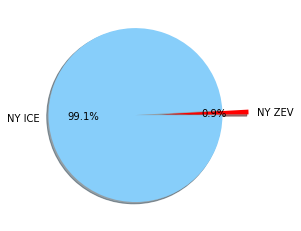

In [42]:
# Count the zev and ice
ny_zev_count = ny_group_df.loc['ELECTRIC','Zip']
ny_ice_count = ny_group_df.loc['GAS','Zip'] + ny_group_df.loc['DIESEL','Zip'] + \
                ny_group_df.loc['PROPANE','Zip'] + ny_group_df.loc['FLEX','Zip'] + \
                ny_group_df.loc['COMP N/G','Zip']
print(f'New York County has total of {ny_zev_count} ZEV and {ny_ice_count} ICE vechicles')

# Labels for the sections of our pie chart
labels = ['NY ZEV', 'NY ICE']
# The values of each section of the pie chart
sizes = [ny_zev_count, ny_ice_count]
# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]
# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.3, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

## California

In [14]:
# Read california vehicles data
ca_car_regis_df = pd.read_csv(filePathCA)
# Check if there is any NaN value, if not clean data. Else drop na data and replace with 0
if ca_car_regis_df.isnull().values.any() == False:
    ca_clean_df = ca_car_regis_df
elif ca_car_regis_df.isnull().values.any() == True:
    ca_clean_df = ca_car_regis_df.fillna(0)
    
ca_clean_df.head()

,ZIPCode,Battery Electric,Diesel,Ethanol,Gasoline,Fuel Cell,Hybrid Gas,Plug-in Hybrid,Natural Gas,Other
0,90001,13,837,1258,32476,0,484,58,11,11
1,90002,20,540,1071,29300,0,436,29,6,5
2,90003,19,671,1334,39247,2,617,37,21,3
3,90004,268,364,581,31260,12,2004,274,8,3
4,90005,77,167,296,16364,3,908,115,5,1


In [15]:
# Create a list of LA and SF zipcode since the DMV data were count by zipcode
la_car_bool = ca_clean_df.ZIPCode.isin(la_zipcode_list)
la_car_df = ca_clean_df.loc[la_car_bool,:]
sf_car_bool = ca_clean_df.ZIPCode.isin(sf_zipcode_list)
sf_car_df = ca_clean_df.loc[sf_car_bool,:]

### Los Angeles County Vehicles Composition

Los Angeles County has total of 410268 ZEV and 7214606 ICE vechicles


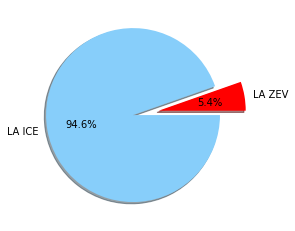

In [43]:
# Count the zev and ice
la_zev_count = la_car_df['Battery Electric'].astype(int).sum() + \
                la_car_df['Plug-in Hybrid'].astype(int).sum() + \
                la_car_df['Fuel Cell'].astype(int).sum() + \
                la_car_df['Hybrid Gas'].astype(int).sum()
la_ice_count = la_car_df['Gasoline'].astype(int).sum() + \
                la_car_df['Diesel'].astype(int).sum() + \
                la_car_df['Ethanol'].astype(int).sum()
print(f'Los Angeles County has total of {la_zev_count} ZEV and {la_ice_count} ICE vechicles')


# Labels for the sections of our pie chart
labels = ['LA ZEV', 'LA ICE']
# The values of each section of the pie chart
sizes = [la_zev_count, la_ice_count]
# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]
# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.3, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

### San Francisco County Vehicles Composition

San Francisco County has total of 46121 ZEV and 430058 ICE vechicles


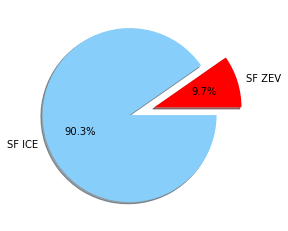

In [44]:
# Count the zev and ice
sf_zev_count = sf_car_df['Battery Electric'].astype(int).sum() + \
                sf_car_df['Plug-in Hybrid'].astype(int).sum() + \
                sf_car_df['Fuel Cell'].astype(int).sum() + \
                sf_car_df['Hybrid Gas'].astype(int).sum()
sf_ice_count = sf_car_df['Gasoline'].astype(int).sum() + \
                sf_car_df['Diesel'].astype(int).sum() + \
                sf_car_df['Ethanol'].astype(int).sum()

print(f'San Francisco County has total of {sf_zev_count} ZEV and {sf_ice_count} ICE vechicles')

# Labels for the sections of our pie chart
labels = ['SF ZEV', 'SF ICE']
# The values of each section of the pie chart
sizes = [sf_zev_count, sf_ice_count]
# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]
# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.3, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

## Harrison County

Harrison has total of 40883 ZEV and 3193667 ICE vechicles


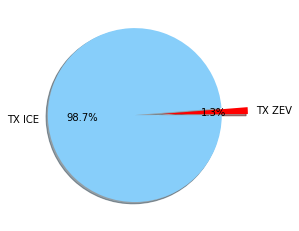

In [20]:
# From alternative fuels reports
texas_population = 29948091
harrison_population = 4713000
# Count the zev and ice and divided base on the population
tx_ice = 16845463+2168253+1276164+3830
tx_zev = 225212+29540+3284+1517+238
tx_ice_count = tx_ice / texas_population * harrison_population
tx_zev_count = tx_zev / texas_population * harrison_population
print(f'Harrison has total of {int(tx_zev_count)} ZEV and {int(tx_ice_count)} ICE vechicles')
# Labels for the sections of our pie chart
labels = ['TX ZEV', 'TX ICE']
# The values of each section of the pie chart
sizes = [tx_zev_count, tx_ice_count]
# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]
# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.3, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

### Cook County

Cook County has total of 51174 ZEV and 3571154 ICE vechicles


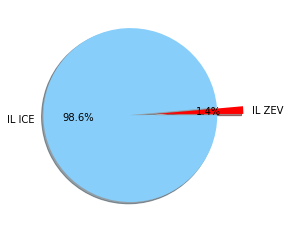

In [49]:
# Total count for the state report
cook_total_reg = 3622328
cook_hybrid = 46280
cook_ev = 4894
# Count the zev and ice
il_zev_count = cook_ev + cook_hybrid
il_ice_count = cook_total_reg - il_zev_count
print(f'Cook County has total of {il_zev_count} ZEV and {il_ice_count} ICE vechicles')
# Labels for the sections of our pie chart
labels = ['IL ZEV', 'IL ICE']
# The values of each section of the pie chart
sizes = [il_zev_count, il_ice_count]
# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]
# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.3, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

## Air Pollution Data 

In [50]:
# Read air pollution data from API output
# Read LA dataset
poll_la_df = pd.read_csv(filePathPollLA)
la_poll = poll_la_df['sample_measurement'].dropna().mean()
# Read SF dataset
poll_sf_df = pd.read_csv(filePathPollSF)
sf_poll = poll_sf_df['sample_measurement'].dropna().mean()
# Read NY dataset
poll_ny_df = pd.read_csv(filePathPollNY)
ny_poll = poll_ny_df['sample_measurement'].dropna().mean()
# Read TX dataset
poll_tx_df = pd.read_csv(filePathPollTX)
tx_poll = poll_tx_df['sample_measurement'].dropna().mean()
# Read IL dataset
poll_il_df = pd.read_csv(filePathPollIL)
il_poll = poll_il_df['sample_measurement'].dropna().mean()

In [58]:
# Create dict for the dataset we collect earlier
car_count_data = {'ICE' : [la_ice_count, sf_ice_count, ny_ice_count, tx_ice_count, il_ice_count],
                     'ZEV' : [la_zev_count, sf_zev_count, ny_zev_count, tx_zev_count, il_zev_count],
                     'PM 2.5' : [la_poll, sf_poll, ny_poll, tx_poll, il_poll],
                     'Area (mi^2)' : [47551, 46.87, 33.77, 1777, 1635]}
# Row index labels
rows = ['Los Angeles', 'San Francisco', 'New York', 'Houston', 'Chicago']
car_count_df = pd.DataFrame(data = car_count_data, index = rows)
car_count_df

,ICE,ZEV,PM 2.5,Area (mi^2)
Los Angeles,7.214606e+06,410268.000000,10.885374,47551.00
San Francisco,4.300580e+05,46121.000000,7.816495,46.87
New York,2.647490e+05,2333.000000,6.820694,33.77
Houston,3.193668e+06,40883.907525,8.164875,1777.00
Chicago,3.571154e+06,51174.000000,10.422320,1635.00


In [59]:
# Scaled the dataset to easy understanding
scaled_df = car_count_df.copy()
scaled_df['ICE'] = (scaled_df['ICE']/1000).map('{:,.2f}'.format)
scaled_df['ZEV'] = (scaled_df['ZEV']/1000).map('{:,.2f}'.format)
scaled_df['PM 2.5'] = scaled_df['PM 2.5'].map('{:,.2f}'.format)
# # 
# scaled_df['# Vehicles / Area'] = (car_count_df['ICE']/car_count_df['Area (mi^2)']).map('{:,.0f}'.format)
# Rename the columns
scaled_df.rename(columns={'ICE': 'ICE (Thousands)', 'ZEV': 'ZEV (Thousands)'})

scaled_df

,ICE,ZEV,PM 2.5,Area (mi^2)
Los Angeles,"7,214.61",410.27,10.89,47551.00
San Francisco,430.06,46.12,7.82,46.87
New York,264.75,2.33,6.82,33.77
Houston,"3,193.67",40.88,8.16,1777.00
Chicago,"3,571.15",51.17,10.42,1635.00


Text(0, 0.5, 'Air Pollution')

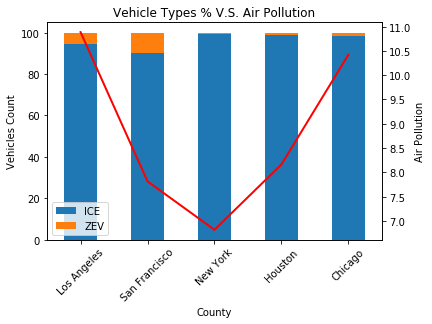

In [60]:
# Create the percentage between ICE and ZEV across the top 5 states
stacked_data = car_count_df[['ICE', 'ZEV']].apply(lambda x: x*100/sum(x), axis=1)
# Create the bar plot
ax1 = stacked_data.plot(kind="bar", stacked=True)
# Create the secondary_y plot
ax2 = car_count_df['PM 2.5'].plot(secondary_y=True,color = 'red',linewidth=2.0)
ax1.set_ylabel("Vehicles Count")
ax1.set_xticklabels(car_count_df.index, rotation=45)
# Create the title and x and y label
plt.title("Vehicle Types % V.S. Air Pollution")
ax1.set_xlabel("County")
ax2.set_ylabel("Air Pollution")

Text(0, 0.5, 'Air Pollution')

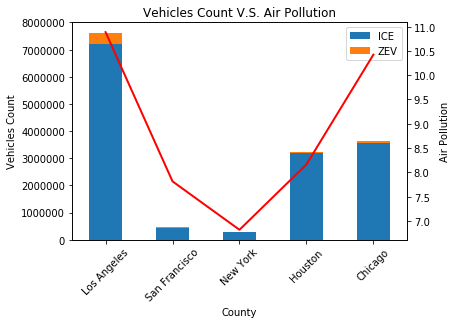

In [61]:
# Create the actual count between ICE and ZEV across the top 5 states
ax1 = car_count_df[['ICE', 'ZEV']].plot (kind = 'bar', stacked=True)
ax2 = car_count_df['PM 2.5'].plot(secondary_y=True,color = 'red',linewidth=2.0)
ax1.set_ylabel("Vehicles Count")
ax1.set_xticklabels(car_count_df.index, rotation=45)
# Create the title and x and y label
plt.title("Vehicles Count V.S. Air Pollution")
ax1.set_xlabel("County")
ax2.set_ylabel("Air Pollution")
